In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Neural Networks (Deep Learning)

* generalization of linear models 
* prediction by a linear regressor:

    $$ y = w_0x_0 + w_1x_1 + ... + w_nx_n + b $$
<br>
* y: weighted sum of the input features x_0 to x_n, weighted by learned coefficent w_0 to w_n. Graphically:
    
<img src="img/deep1.png" alt="Drawing" style="width: 200px;"/>

* Deep Learning is used to make predicitions

#### Example

* Predict bank transactions based on some features: age, balance, retirement status etc .. 

<img src="img/deep0.png" alt="Drawing" style="width: 400px;"/>

* In linear regression we assume no interactions between features
* In DL those are taken into account and it will yiled different results

<img src="img/deep4.png" alt="Drawing" style="width: 550px;"/>

# Interactions (Hidden Layers)

<img src="img/deep5.png" alt="Drawing" style="width: 300px;"/>

* Three types of layers:
    * **Input Layer**: Features (age, income)
    * **Hidden Layer**: Series of *nodes* or interactions between features. Aggregation of information from input.
    * **Output Layer**: Model prediction layer.
    
<img src="img/deep6.png" alt="Drawing" style="width: 300px;"/>

#### How does it work?

# Forward propagation (algorithm)

* Forward propagation on *Number of Transactions* example
* Let's use only 2 features (inputs): #children and #bank accounts each user has.
* Lines connect Input to Hidden Layer with certain **weight**
* **Weight**: how strongly input feature affects the interaction node
* If a person has 2 children and 3 bank accounts and we have initial weights:

<img src="img/deep7.png" alt="Drawing" style="width: 400px;"/>

* Top hidden node = $2\cdot1 + 3\cdot1 = 5$
* Bottom hidden node = $2\cdot(-1) + 3\cdot1 = 1$
* Output = $5\cdot2 + 1\cdot(-1) = 9$

In [2]:
inp = np.array([2, 3])

w = {'h0': np.array([1, 1]),
     'h1': np.array([-1, 1]),
     'out': np.array([2, -1])}

hid_layer = np.array([(inp * w['h0']).sum(),
                     (inp * w['h1']).sum()])

output = (hid_layer * w['out']).sum()

print('Inputs: {} Hidden Layer: {} Output: {}'.format(
    inp, hid_layer, output))

Inputs: [2 3] Hidden Layer: [5 1] Output: 9


##### Exercise on Forward Propagation

* user has 3 bank accounts and 5 children

![title](img/deep8.png)

In [3]:
inp = np.array([3,5])

w = {'h0': np.array([2, 4]),
    'h1': np.array([4, -5]),
    'out': np.array([2, 7])}

h_layer = np.array([(inp * w['h0']).sum(),
                   (inp * w['h1']).sum()])

output = (h_layer * w['out']).sum()

print('Inputs: {}   Hidden Layer: {}   Output: {}'.format(
    inp, h_layer, output))

Inputs: [3 5]   Hidden Layer: [ 26 -13]   Output: -39


* While the -39 output value is correct it doesn't make sense.
* Transactions count cannot be negative.
* This can be fixed with an activation function applied to each node in the hidden layers.

# Activation Functions

* After computing hidden node values a **nonlinear function** is applied to each node result. 
* Activation functions allow to capture nonlinear trends in the hidden layer
* Most popular activation functions:
    * **rectifying nonlinearity**
    * **tangens hyperpolicus**

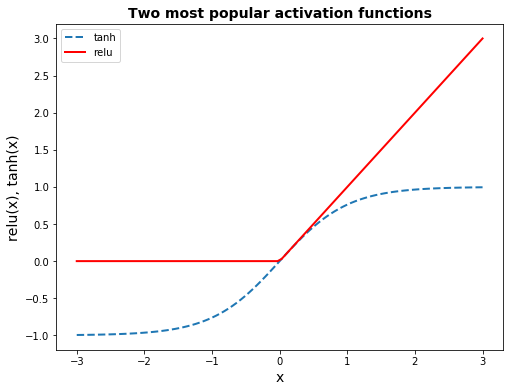

In [4]:
line = np.linspace(-3, 3, 100)

plt.figure(figsize=(8, 6))
plt.plot(line, np.tanh(line), ls='--', lw=2, label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu", c='red', lw=2)
plt.legend(loc="best")
plt.xlabel("x", fontsize=14)
plt.ylabel("relu(x), tanh(x)", fontsize=14)
plt.title('Two most popular activation functions', weight='bold', fontsize=14)
plt.show()

## ReLU (Rectified Linear Activation)
<br>
<img src="img/deep9.png" alt="Drawing" style="width: 500px;"/>

* This function takes a single number as an input, returning 0 if the input is negative
* Returning the input if the input is positive. 

#### Demo Exercise. ReLU on small NW

* number of banck accounts 3
* number of children 5

![title](img/deep8.png)

In [5]:
def relu(inp):
    return max(inp, 0)

inp = np.array([3, 5])

w = {'h0': np.array([2, 4]),
    'h1': np.array([4, -5]),
    'out': np.array([2, 7])}

h_layer = np.array([relu((inp * w['h0']).sum()),
                   relu((inp * w['h1']).sum())])

output = (h_layer * w['out']).sum()

print('Inputs: {}   Hidden Layer: {}   Output: {}'.format(
    inp, h_layer, output))

Inputs: [3 5]   Hidden Layer: [26  0]   Output: 52


* The output was 52 transactions, which makes more sense as prevously got -39
* Activation function power will be revealed when we start to tune weights!

# Multiple Hidden Layers

<img src="img/deep10.png" alt="Drawing" style="width: 500px;"/>

Lets calculate the output with ReLU

In [6]:
inp = np.array([3, 5])

w = {'h00': np.array([2,4]),
    'h01': np.array([4,-5]),
    'h10': np.array([-1, 2]),
    'h11': np.array([2, 2]),
    'out': np.array([-3, 7])}

h0_layer = np.array([relu((inp * w['h00']).sum()),
                    relu((inp * w['h01']).sum())])

h1_layer = np.array([relu((h0_layer * w['h10']).sum()),
                    relu((h0_layer * w['h11']).sum())])

output = (h1_layer * w['out']).sum()

print('Input: {}  h0: {}  h1: {}  output: {}'.format(
    inp, h0_layer, h1_layer, output))

Input: [3 5]  h0: [26  0]  h1: [ 0 52]  output: 364


<img src="img/deep11.png" alt="Drawing" style="width: 500px;"/>

# Optimization

* The more datapoints one has the harder the right prediction.
* At any set of weights, there are many values of the error

## Loss function

* Aggregates errors in predictions from many data points into single number
* Measure of model’s predictive performance

### Squred Error Loss Function

<img src="img/deep12.png" alt="Drawing" style="width: 400px;"/>

* total error 150
* mean error 50

* Lower loss function value means a better model
* Goal: Find the weights that give the lowest value for the loss function
* **Gradient descent** loss function

In [7]:
def predict_neural(input_, weights):
    '''Generate Neural Network Output with
    given input array and weights'''

    hid_layers = int((len(weights) - 1) / len(input_))
    h_layers = []
    
    for h_layer in range(hid_layers + 1):
        if h_layer == 0:
            h0_layer = np.array([relu((input_ * weights['h0' + 
                str(i)]).sum()) for i in range(len(input_))])
            h_layers.append(h0_layer)
            
        elif h_layer == hid_layers:
            output = (h_layers[-1] * weights['out']).sum()
            return output
        
        else:
            layer = np.array([relu((h_layers[-1] * weights['h' + str(h_layer) + 
                str(i)]).sum()) for i in range(len(input_))])
            h_layers.append(layer)

#### Model perfrmance comparison with two set of weights

In [8]:
weights_0 = {'h00': np.array([2, 1]), 
             'h01': np.array([1, 2]), 
             'out': np.array([1, 1])}

weights_1 = {'h00': np.array([2, 1]),
             'h01': np.array([1., 1.5]),
             'out': np.array([1., 1.5])}

input_data = [np.array([0, 3]), 
              np.array([1, 2]), 
              np.array([-1, -2]), 
              np.array([4, 0])]

target_actuals = [1, 3, 5, 7]

In [9]:
model_0_predictions = []
model_1_predictions = []

for row in input_data:
    model_0_predictions.append(predict_neural(row, weights_0))
    model_1_predictions.append(predict_neural(row, weights_1))
    
# calculate mean_squred_errors for models
m0_mse = mean_squared_error(target_actuals, model_0_predictions)
m1_mse = mean_squared_error(target_actuals, model_1_predictions)

print('MSE with weights_0: {:.2f}'.format(m0_mse))
print('MSE with weights_1: {:.2f}'.format(m1_mse))

MSE with weights_0: 37.50
MSE with weights_1: 49.89


# Gradient Descent

#### Gradient descent intuitively:
    1. Imagine you are in a pitch dark field (random point)
    2. Want to find the lowest point 
    3. Feel the ground to see how it slopes
    4. Take a small step downhill
    5. Repeat until it is uphill in every direction

### 1D

* Optimal weight at point where loss function is at <font color='red'>**minimum**</font>
* The tangent lines at given point gives the slope/gradient of the loss function at our current weight. 
* Here the gradient is positive and therefore moving toward smaller gradient
    
<img src="img/deep14.png" alt="Drawing" style="width: 500px;"/>

### 2D

<img src="img/deep13.png" alt="Drawing" style="width: 500px;"/>

* If the gradient is **positive**:
    * Going opposite the gradient = moving to lower numbers
    * Subtract the gradient from current value
    * Steps cannot be too big, otherwise can skip useful balance point
* Solution **learning rate**:
    * Update each weight by subtracting <br>
        **learning rate * gradient**

# Gradient Calculation

<br>
<img src="img/deep27.png" alt="Drawing" style="width: 600px;"/> 
<br>

### General gradient descent equation: 
<br>
<br>

$$\frac{\partial E}{\partial w} =  \frac{\partial (a^L - y)^2}{\partial w} = \frac{\partial (a^L-y)^2}{\partial a^L} \frac{\partial z^L}{\partial w} \frac{\partial a^L}{\partial z^L} = 2(a^L-y)\frac{\partial (wa^{L-1})}{\partial w} \frac{\partial \sigma(z^L)}{\partial z^L} = 2\Delta a^{L-1} \sigma'(z^L)$$

<br>
<br>

#### Quantities to be multiplied:
1. **Derivative** of the **loss function** w.r.t to target $2\Delta$<br>
2. **Input node** value $a^{L-1}$
3. **Activation function** <font color='red'>**DERIVATIVE**</font> w.r.t target $\sigma'(z^L)$

Activation function derivatives:

<img src="img/deep28.png" alt="Drawing" style="width: 600px;"/> 

Weight gradient calculation example using ReLU activation function:

$$\frac{\partial E}{\partial w} = 2\Delta a^{L-1} \sigma'(z^L) = 2(6-10)\cdot3\cdot 1 = -24$$   

## Backpropagation: Updating Weights

* Allows **weight upgrades** with **gradient decent**

### Backpropagation process

* To estimate the gradient of the loss function w.r.t each weight
    1. Do forward propagation: find predictions and errors
    2. From output (layer) go backwards one layer at a time
    
$$w_{new} = w - x_{\text{rate}}\frac{\partial E}{\partial w}$$

Where $x$ is **learning rate**. If $x=0.01$:

$$w_{new} = 2 - 0.01\cdot(-24) = 2.24$$

<font color='green'>__Each time you generate predictions using forward propagation, you update the weights using backward propagation!__</font>

#### Exercise. Update the Weights

<img src="img/deep29.png" alt="Drawing" style="width: 500px;"/>

In [24]:
# lets confirm the weight values with forward propagation
inp = np.array([2, 3])
w1_4 = np.array([[.11, .21], [.12, .08]])
w5_6 = np.array([.14, .15])
h1h2 = np.array([relu((inp * w1_4[0]).sum()),
                relu((inp * w1_4[1]).sum())])
out = relu((h1h2 * w5_6).sum())
print('Input: {}  Hidden Layer: {}  Output: {}'.format(
    inp, h1h2, out))

Input: [2 3]  Hidden Layer: [0.85 0.48]  Output: 0.191


Finding the weight gradients for $w_6$ and $w_1$:

$
\begin{align*}
\frac{\partial E}{\partial w_6} &= \frac{\partial E}{\partial w_6} \frac{\partial a^1}{\partial a^1} \frac{\partial z^1}{\partial z^1} = \frac{\partial E}{\partial a^1} \frac{\partial z^1}{\partial w_6} \frac{\partial a^1}{\partial z^1} = \frac{\partial \frac{1}{2}(a^1 - y)^2}{\partial a^1} \frac{\partial(w_5h_1 + w_6h_2)}{\partial w_6} \frac{\partial \sigma(z^1)}{\partial z^1} = (a^1-y)h_2\sigma'(z^1) = \Delta h_2 \sigma'(z^1)\\
\frac{\partial E}{\partial w_6} &= (0.191 -1)\cdot 0.48 ReLU'(0.191) = (0.191 - 1)\cdot 0.48 \cdot 1 = -0.3883 \\
&.\\
&.\\
&.\\
\frac{\partial E}{\partial w_1} &= \frac{\partial E}{\partial a^1} \frac{\partial z^1}{\partial w_1} \frac{\partial a^1}{\partial z^1} = \frac{\partial \frac{1}{2}(a^1-y)^2}{\partial a^1} \frac{\partial (w_5h_1 + w_6h_2)}{\partial w_1} \frac{\partial \sigma(z^1)}{\partial z^1} = \Delta \frac{\partial[w_5(w_1i_1 + w_2i_2)+w_6(w_3i_1 + w_4i_2)]}{\partial w_1} \sigma'(z^1) = \\
&= \Delta w_5l_1 \sigma'(z^1) \\
\frac{\partial E}{\partial w_1} &= (0.191 - 1)\cdot 0.14\cdot 2\cdot ReLU'(0.191) = −0.22652
\end{align*}
$

* The coefficient $\frac{1}{2}$ in front of Error/Loss function is just added to ease the derivative calculation. It might as well can be there.
* All weight gradients:

In [27]:
w1_4.ravel()

array([0.11, 0.21, 0.12, 0.08])

In [31]:
delta = 0.191 - 1
w5_6_grad = np.array([delta * h1h2[0], delta * h1h2[1]])
w1_4_grad = np.array([delta * w5_6[0] * inp[0],
                      delta * w5_6[0] * inp[1],
                      delta * w5_6[1] * inp[0],
                      delta * w5_6[1] * inp[1]])
w1_4_grad

array([-0.22652, -0.33978, -0.2427 , -0.36405])

* New weights are calculated with:

$w^* = w - x\frac{\partial E}{\partial w}$,

where $x$ is the learning rate. With **x=0.05** we get new weights:

In [46]:
# new weights
x = 0.05
w5_6_new = np.array([old - (x * grad) for old, grad in zip(w5_6, w5_6_grad)])
w1_4_new = np.array([old - (x * grad) for old, grad in zip(w1_4.ravel(), w1_4_grad)])
w1_4_new

# new hidden layer and output values
h1h2_new = np.array([(inp * w1_4_new[:2]).sum(),
                     (inp * w1_4_new[2:]).sum()])
out = (h1h2_new * w5_6_new).sum()

print('w1 - w4:{}'.format(np.around(w1_4_new, 2)))
print('\nh1 - h2:{}'.format(np.around(h1h2_new, 2)))
print('\nw5 - w6:{}'.format(np.around(w5_6_new, 2)))
print('\nNew Prediction: {}'.format(np.around(out, 2)))

w1 - w4:[0.12 0.23 0.13 0.1 ]

h1 - h2:[0.92 0.56]

w5 - w6:[0.17 0.17]

New Prediction: 0.26


<img src="img/deep30.png" alt="Drawing" style="width: 500px;"/>

#### Exercise. Find new weights and plot error function evolution

In [10]:
def get_slope_mse(input_, weights, target):
    pred = (input_ * weights).sum()
    error = pred - target
    slope = 2 * error * input_
    mse = mean_squared_error([pred], [target])
    return slope, mse

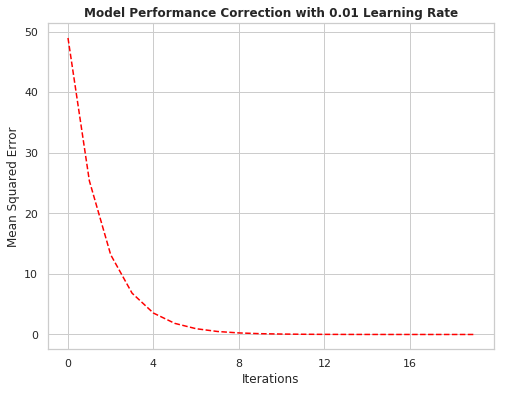

In [11]:
input_data  = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0
learning_rate = 0.01
n_updates = 20

mse_vals= []
for update in range(n_updates):
    slope, mse = get_slope_mse(input_data, weights, target) 
    mse_vals.append(mse)
    
    # update the weights
    weights = weights - learning_rate * slope

# plotting the model improvement
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(range(n_updates), mse_vals, linestyle='--', c='red')
plt.xticks(np.arange(0, 20, 4))
plt.title('Model Performance Correction with 0.01 Learning Rate', weight='bold')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

* iterations with small learning rate corrections to weights improve model performance until saturation
* when we have many layers and number of hidden nodes it is not compuationally effective to do forward- and back propagation for each weight and node. An approximation is then used - stochastic gradient decent

# Stochastic Gradient Decent (SGD)

* For computational efficiency it is common to calculate gradients only on a subset o the data ('batch') for each update of the weights.
- Uses a **different batch of data** at each run
- Start over from the beginning once all the data is used 
- Each full cycle through the training data is called an **epoch**
- When gradients are calculated on one epoch at the time - **Stochastic Gradient Descent**